# Анализ исторических данных о продажах игр с целью выявления закономерностей, определяющих успешность игры как объекта реализации.

# Описание проекта:

Анализ проводится для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Датасет загружен из открытых источников, в котором отражены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные до 2016 года включительно.

**Цель:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. 


# Описание данных:

**Содержание колонок:**
- name — название игры
- platform — платформа
- year_of_release — год выпуска
- genre — жанр игры
- na_sales — продажи в Северной Америке (миллионы проданных копий)
- eu_sales — продажи в Европе (миллионы проданных копий)
- jp_sales — продажи в Японии (миллионы проданных копий)
- other_sales — продажи в других странах (миллионы проданных копий)
- critic_score — оценка критиков (максимум 100)
- user_score — оценка пользователей (максимум 10)
- rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

ESRB (Entertainment Software Rating Board) - это негосударственная организация, которая принимает и определяет рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

**Расшифровка рейтинга ESRB:**
- E (Everyone)- для всех возрастных категорий
- E10+ (Everyone 10 and older) — для всех старше 10 лет
- T (Teen ) — подросткам 13—19 лет
- M (Mature) — от 17 лет
- AO (Adults only) - старше 18 лет
- EC (Early childhood) - для детей от 3 лет
- RP (Rating pending) -  категория ещё не присвоена

# Шаг 1. Открытие и изучение общей информации о файле

In [1]:
                                                                                                                                                                        
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import math

try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

data.head(10)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# пропуски есть в name, year, genre, critic_score, user_score, rating

# **Шаг 2. Подготовка данных**

In [4]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#year_of_release нужно привести к Date
#user score к типу float?

In [7]:
data['year_of_release'] = data['year_of_release'].fillna('0')
data['year_of_release'] = data['year_of_release'].astype('int64')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [9]:
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

In [10]:
data[data['year_of_release'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Для некоторых игр год указан в их наименовании. Как его перенести (да и нужно ли это) - пока не знаю**

В столбце 'user_score' обнаружилось значение 'tbd'

In [11]:
data['user_score'][119]

'tbd'

In [12]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [13]:
# строк с содержимым 'tbd' в 'user_score' - 2424

**TBD** - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

В данном случае это значит, что оценка пользователей еще не проведена. Возможно игра вышла недавно или у нее было мало продаж.

In [14]:
tbd_data = data[data['user_score'] == 'tbd']

In [15]:
tbd_data.groupby('year_of_release').mean(['na_sales','eu_sales','jp_sales'])

,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,,,,,
0,0.151458,0.035833,0.000000,0.013750,58.500000
1997,0.030000,0.020000,0.000000,0.000000,76.000000
1999,0.406250,0.110000,0.000000,0.018750,62.000000
2000,0.170000,0.119767,0.007442,0.026512,62.075000
2001,0.147195,0.079390,0.003415,0.015000,66.304348
2002,0.088385,0.037031,0.001302,0.005833,64.337209
2003,0.103158,0.042421,0.000000,0.007053,62.023810
2004,0.139533,0.055888,0.004299,0.007570,60.222222
2005,0.106777,0.039752,0.001488,0.008926,60.477778


Версия подтверждается - среднее количество продаж по данным играм мало: менее миллиона, а в некоторых случаях менее 100к.
таких строк - 14.5% от общего количества. Может стоит удалить их? Или как можно заполнить?

Заменим значения 'tbd' в 'user_score' на NaN и поменяем тип на 'float'

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [17]:
data['user_score'] = data['user_score'].astype('float')

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Удалим 2 строки с пропущенными значениями в name

In [19]:
data = data.dropna(subset = ['name'])

В столбцах critic_score, user_score, rating оставим пропуски, так как их изменение или удаление может повлечь искажение в анализе.
Пропуски могут быть из-за того, что критики и пользователи не успели оценить игру.

In [20]:
data['name'].isna().sum()

0

In [21]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

**Расшифруем аббревиатуры в rating и создадим отдельный столбец ('age') с расшифровкой**

In [22]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-block alert-warning">
Заметим, что рейтинг K-A в 1998 году переименован в Е. Значит, что до 1998 игры с таким рейтингом эквивалентны рейтингу Е и подходят для всех возрастных категорий.

In [23]:
rating_dict = {'E':'для всех возрастов', 'K-A':'для всех возрастов', 'M':'старше 17 лет',
               'T':'старше 13 лет', 'E10+':'старше 10 лет', 'AO':'старше 18 лет',
               'EC':'для детей от 3 лет', 'RP':'категория ещё не присвоена', 'nan':'не указано'}

In [24]:
data['age'] = data['rating'].map(rating_dict)

In [25]:
data['age'].unique()

array(['для всех возрастов', nan, 'старше 17 лет', 'старше 13 лет',
       'старше 10 лет', 'старше 18 лет', 'для детей от 3 лет',
       'категория ещё не присвоена'], dtype=object)

**Посчитаем суммарные продажи во всех регионах**

In [26]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [27]:
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

<div class="alert alert-block alert-success">
Шаг 2: выводы.

Данные подготовлены:
- названия столбцов приведены к единому виду и нижнему регистру
- типы данных изменены там, где это необходимо
- удалены строки с пропущенными значениями в name
- в столбцах 'critic_score', 'user_score', 'rating' оставлены пропуски, так как их изменение или удаление может повлечь искажение в анализе
- в age расшифрованы аббревиатуры столбца 'rating'
- в 'total_sales' посчитаны суммарные продажи по всем регионам

# Шаг 3. Исследовательский анализ данных (EDA)

### 3.1. Посмотрим, сколько игр выпускалось в разные годы

In [28]:
dy_pivot = data.pivot_table(index='year_of_release', values='name', aggfunc = 'count')

In [29]:
dy_pivot.sort_values(by = 'name', ascending = False)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


**Больше всего игр было выпущено в 2008 году (1427 игр), меньше всего - в 1980 году (9 игр). Расцвет ниши пришелся на 2007-2011 года.
Существенным количеством можно считать свыше 200, то есть наблюдать с 1995 года.**

In [30]:
data[data['year_of_release']>1950]['year_of_release'].min()

1980

In [31]:
data['year_of_release'].max()

2016

Визуализируем с помощью гистограммы общее количество выпущенных игр в разбивке по годам

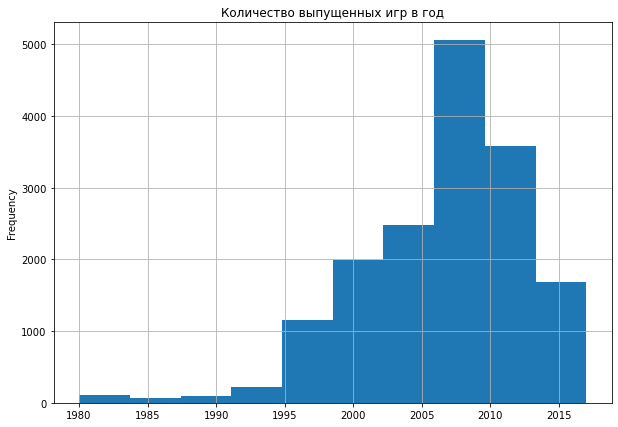

In [32]:
data['year_of_release'].plot(kind='hist', range=(1980, 2017), grid=True,
                             figsize=(10,7), title='Количество выпущенных игр в год');

Данные до 1995 года можно считать неважными для анализа ввиду малого количества игр в эти годы. То есть данные с 1980 по 1995 годы можно отсечь. В 1995 году выпущено примерно столько же игр, как до 1995 в сумме за 15 лет. 

Судя по графику, количество игр начинает резко расти примерно после 2002 года вплоть до 2010. Визуализируем этот период.

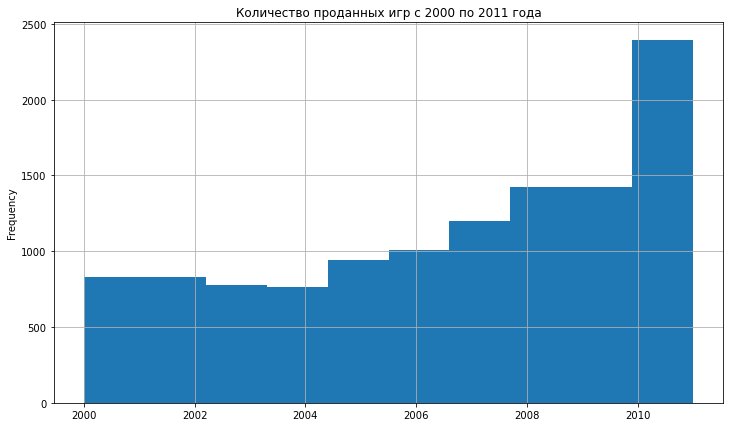

In [33]:
data['year_of_release'].plot(kind='hist', range=(2000, 2011), grid=True,
                             figsize=(12,7), title='Количество проданных игр c 2000 по 2011 года');

Количество проданных игр возрастает с 2005 года, достигает пика в 2008-2009 годах, далее снижается. То есть период роста и расцвета, это период с 2005 по 2009 включительно.

### 3.2. Рассмотрим общие продажи по платформам

In [34]:
ds_pivot = data.pivot_table(index='platform', values='total_sales', 
                            aggfunc='sum').sort_values('total_sales',ascending = False)

Выделим 10 платформ с наибольшим количеством общих продаж:

In [35]:
top_10_platforms = ds_pivot.head(10)

In [36]:
top_10_platforms = top_10_platforms.reset_index()

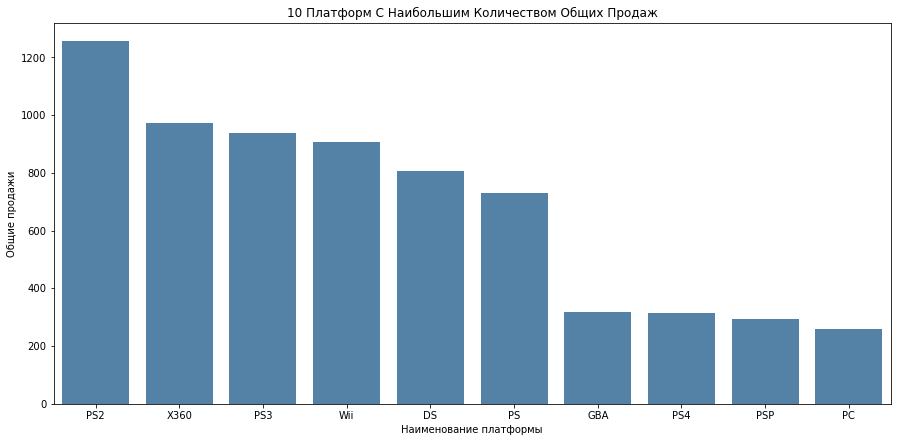

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x="platform", y="total_sales", 
            color='steelblue', data=top_10_platforms).set_title('10 Платформ С Наибольшим Количеством Общих Продаж');
plt.xlabel('Наименование платформы')
plt.ylabel('Общие продажи')
plt.show()

Больше всего продаж за все годы у платформы PS2, меньше всего - у PC

## 3.3. **Посмотрим, за сколько появляются и исчезают новые платформы и как долго они существуют**

Для каждой платформы из ТОП-10 построим графикс распределением суммарных продаж по годам. По этим столбчатым диаграммам определим годы появления, расцвета и, если он произошел, упадка платформы:

In [38]:
top_10_platforms = top_10_platforms.reset_index()

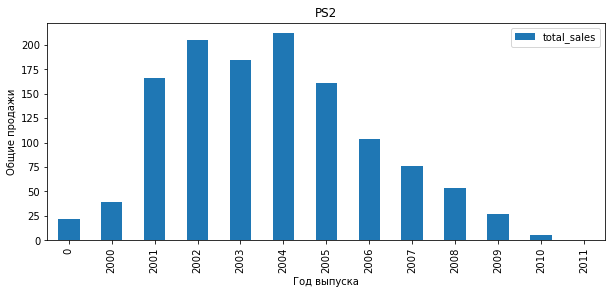

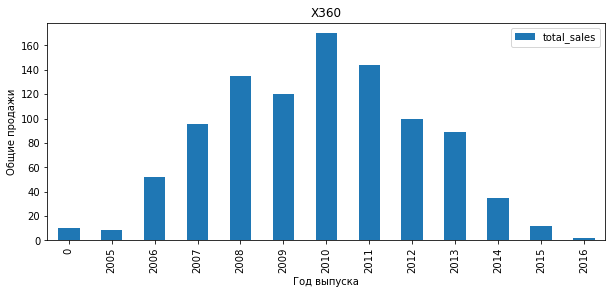

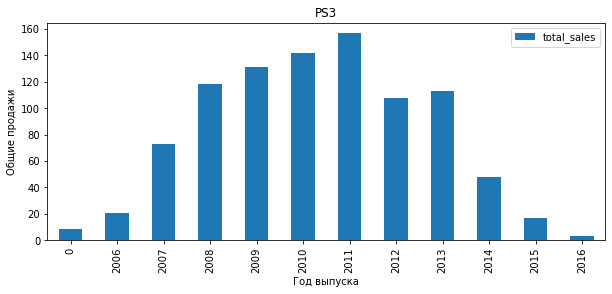

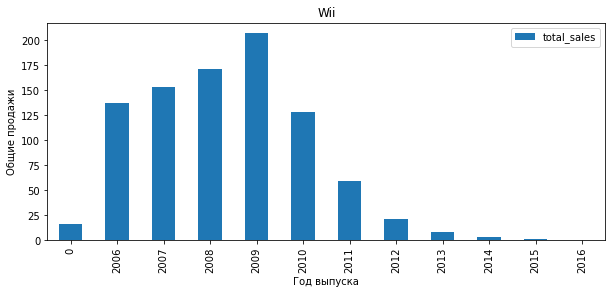

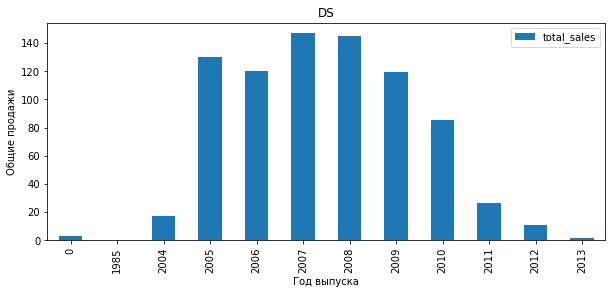

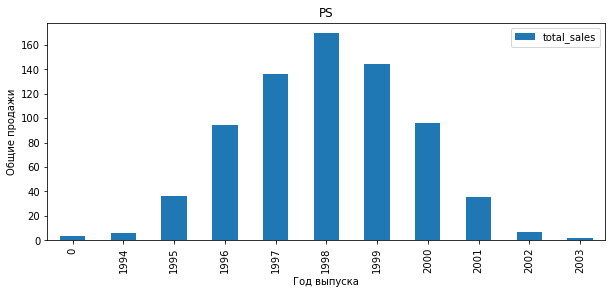

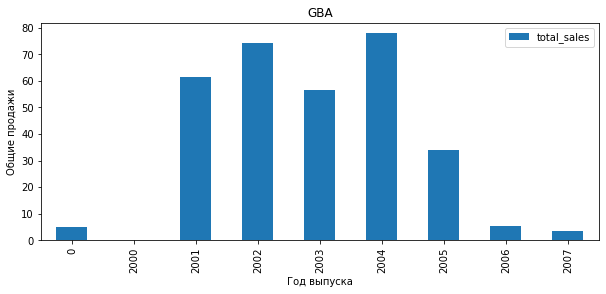

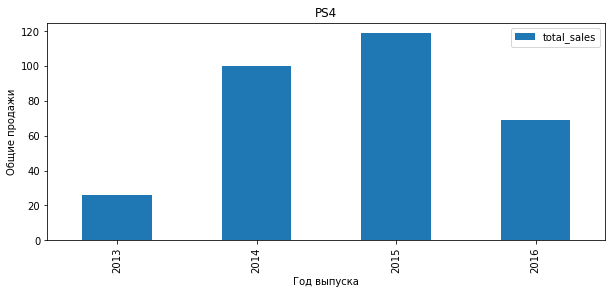

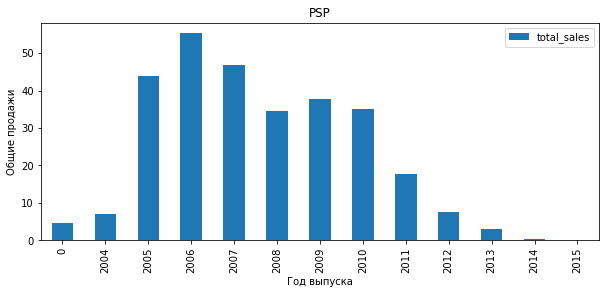

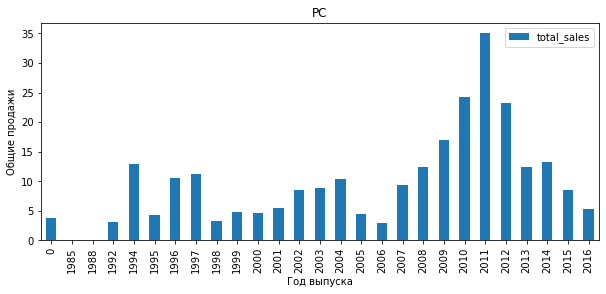

In [39]:
for p in top_10_platforms['platform']:
    data[data['platform'] == p].pivot_table(index='year_of_release', 
                                            values='total_sales', 
                                            aggfunc = 'sum').plot(kind = 'bar', figsize=(10,4))
    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи')
    plt.title(p)

In [40]:
top_10_platforms

,index,platform,total_sales
0,0,PS2,1255.77
1,1,X360,971.42
2,2,PS3,939.65
3,3,Wii,907.51
4,4,DS,806.12
5,5,PS,730.86
6,6,GBA,317.85
7,7,PS4,314.14
8,8,PSP,294.05
9,9,PC,259.52


<div class="alert alert-block alert-success">
В среднем платформы живут 8-10 лет. Самая долгоживущая - это PC, которая появилась в самом начале 90-х. В основном, игровые платформы появляются в конце 90-х - начале 2000-х годов. 

**Несмотря на то, что платформа PC занимает поледнее место в топ-10 по общим продажам игр, она является самой долгоживущей.**

**Теперь нам необходимо выбрать временной период для последующего анализа и прогнозирования на 2017 год. Расцвет игровых платформ приходится на начало 2000-х, а точнее на 2005-2006 года. Их и следует считать отправной точкой в дальнейшем анализе. Возьмем период с 2005 по 2016 год, так как для более точного прогнозирования нам нужен полноценный жизненный цикл платформ.**

In [41]:
actual_period = data.query('year_of_release >= 2005')


In [42]:
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,для всех возрастов,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,для всех возрастов,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,для всех возрастов,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,для всех возрастов,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,для всех возрастов,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01


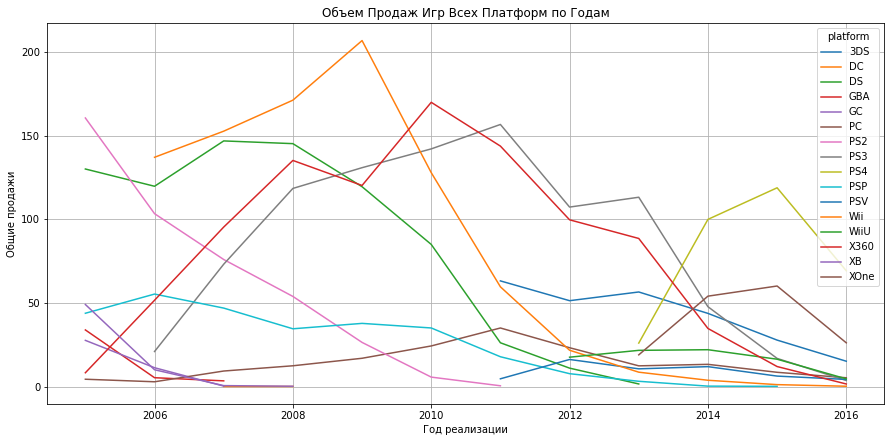

In [43]:
actual_period.pivot_table(index = 'year_of_release', 
                          columns = 'platform', 
                          values = 'total_sales', 
                          aggfunc = 'sum').plot(grid=True, figsize=(15, 7))
plt.xlabel('Год реализации')
plt.ylabel('Общие продажи')
plt.title('Объем Продаж Игр Всех Платформ по Годам');

А вот теперь посмотрим на полученный график. **Видно, что в 2013 году некоторые платформы заканчивают существование (PSP), а другие (PS4 и XOne) появляются. У большинства 2013-2014 года  и далее выглядят кризисными. Это наталкивает на мысль, что мы взяли слишком широкий временной период для анализа.**

**У всех платформ в 2015 году продажи стали резко падать. Потенциально прибыльными являются PS4, XBox One и PC (которая демонстрирует не самые высокие, но стабильные продажи на протяжении многих лет), также 3DS. Мы видим их, оставшихся намного выше на графике, остальные платформы сдают свои позиции.**

Построим линейный график по этим четырем платформам с 2013 года (год, когда появились PS4 и XBox One, а многие другие платформы стали терять свои позиции). **Возьмем за актуальный именно этот период времени (2013 г.-2016 г.)**:

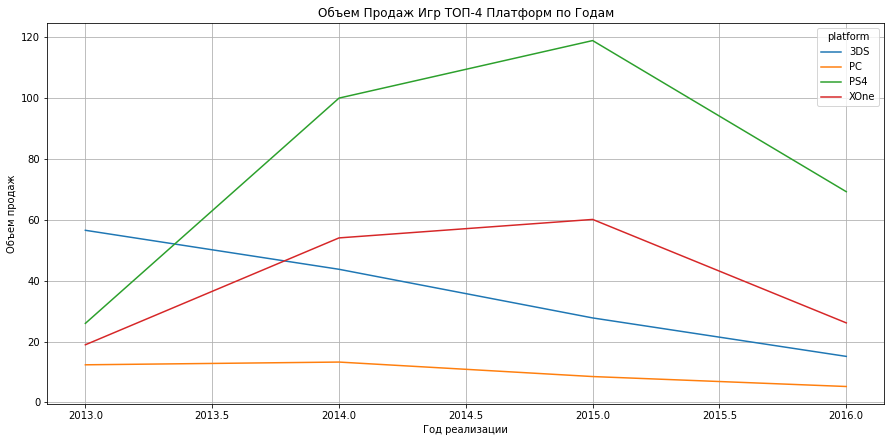

In [44]:
#актуальный период с 2013 по 2016 включительно и потенциально прибыльные платформы:
actual_period2 = data.query('year_of_release >= 2013 and platform == ["PS4", "XOne", "3DS", "PC"]')
actual_period2.pivot_table(index = 'year_of_release', 
                           columns = 'platform', 
                           values = 'total_sales', 
                           aggfunc = 'sum').plot(grid=True, figsize=(15, 7))
plt.xlabel('Год реализации')
plt.ylabel('Объем продаж')
plt.title('Объем Продаж Игр ТОП-4 Платформ по Годам');

**Средний срок существования платформ составляет 8-10 лет - PS4, XOne, 3DS как раз подходят для периода прогнозирования (они появились лишь в 2013 г.), а PC выпадает из статистики по прочим платформам, поэтому мы также включаем ее в анализ.**

## 3.4. **Построим график «ящик с усами» по глобальным продажам игр в разбивке по всем платформам**

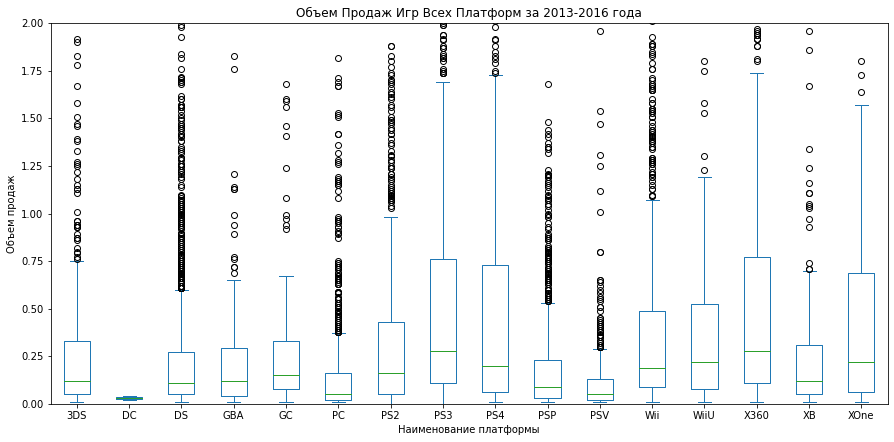

In [45]:
actual_period.pivot_table(index = 'name', 
                          columns = 'platform', 
                          values = 'total_sales', 
                          aggfunc = 'sum').plot(kind='box', ylim=(0,2), figsize=(15, 7))
plt.xlabel('Наименование платформы')
plt.ylabel('Объем продаж')
plt.title('Объем Продаж Игр Всех Платформ за 2013-2016 года');

За анализируемый актуальный период наибольшее количество игр было продано для приставки PS3 (видимо, в период ее максимальной популярности).
PS4 появилась только в 2013 году, но растет очень быстро и догоняет объемы продаж игр предыдущей версии прмставки. Практически на одном уровне с PS4 находится XOne.
Самая непопулярная игровая платформа - это DC.

**Теперь визуализируем наши избранные четыре платформы на графике "ящик с усами":**

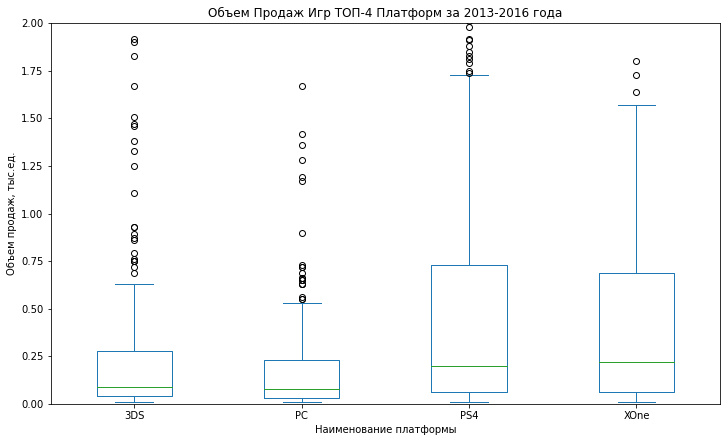

In [46]:
actual_period2.pivot_table(index = 'name', 
                           columns = 'platform', 
                           values = 'total_sales', 
                           aggfunc = 'sum').plot(kind='box', ylim=(0,2), figsize=(12,7))
plt.xlabel('Наименование платформы')
plt.ylabel('Объем продаж, тыс.ед.')
plt.title('Объем Продаж Игр ТОП-4 Платформ за 2013-2016 года');

<div class="alert alert-block alert-success">
Медианный объем продаж для 3DS почти эквивалентен PC, медианные объемы продаж для PS4 и XOne также близки по значениям. При этом PS4 и XOne являются лидерами по данному показателю.

<div class="alert alert-block alert-warning">
На графике отражено достаточно много выбросов, но это также может быть связано с точечными увеличениями объема продаж или повышением спроса/предложения в определенные моменты. Удалять их не стоит во избежание искажения результатов.

### 3.5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Итак, мы пришли к выводу, что актуальный период времени - это период с 2013 года включительно. Поэтому - создадим соответствующий актуальный датасет, но уже со всеми игровыми платформами, существующими в этот период времени:

In [47]:
actual_period3 = data.query('year_of_release >= 2013')

**Самая популярная платформа на анализируемый период - PS4.** Посмотрим, как влияют на продажи PS4 отзывы пользователей и критиков. Gостроим диаграмму рассеяния по PS4 и отразим на ней распеределение объемов продаж игр на платформе с оценками этих игр пользователями

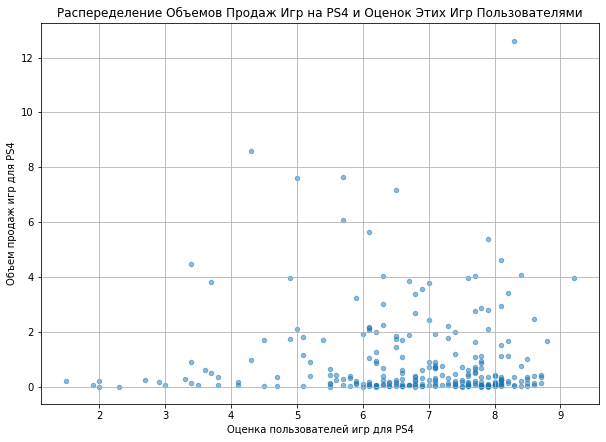

In [48]:
actual_period3[actual_period3['platform']=='PS4'].plot(x='user_score', 
                                                       y='total_sales', 
                                                       kind='scatter', 
                                                       alpha=0.5, 
                                                       figsize=(10,7), grid=True)
plt.xlabel('Оценка пользователей игр для PS4')
plt.ylabel('Объем продаж игр для PS4')
plt.title('Распеределение Объемов Продаж Игр на PS4 и Оценок Этих Игр Пользователями')
plt.show()

Не у всех игр с высокой оценкой пользователей высокие показатели продаж, а также не у всех игр с высокими показателями продаж высокие пользовательские оценки. Многие показатели объема продаж не имеют особого увеличения при увеличении оценки пользователей. 

**Построим диаграмму рассеяния по PS4 и отразим на ней распередение объемов продаж игр на платформе с оценками этих игр критиками:**

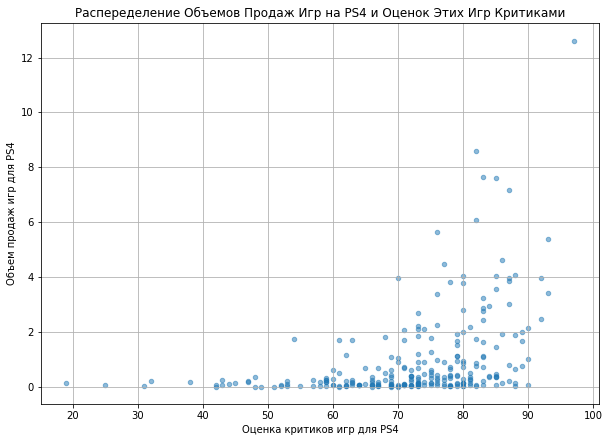

In [49]:
actual_period3[actual_period3['platform']=='PS4'].plot(x='critic_score', 
                                                       y='total_sales', 
                                                       kind='scatter', 
                                                       alpha=0.5, 
                                                       figsize=(10,7), grid=True)
plt.xlabel('Оценка критиков игр для PS4')
plt.ylabel('Объем продаж игр для PS4')
plt.title('Распеределение Объемов Продаж Игр на PS4 и Оценок Этих Игр Критиками')
plt.show()

В анализе зависимости объемов продаж и оценок критиков иная картина: мы видим, что с увеличением оценки критиков также возрастает количество продаж некоторой части игр. Игры с низким рейтингом плохо продаются. Влияние не критичное, но оно есть.

**Посмотрим на зависимость данных показателей оценок и продаж в числах и вычислим коэффициент корреляции Пирсона:**

In [50]:
#вычислим коэффициент корреляции Пирсона для объема продаж и пользовательской оценки PS4
data_PS4 = actual_period3[actual_period3['platform'] == 'PS4']
PS4_corr = data_PS4[['total_sales', 'critic_score', 'user_score']]
PS4_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


**Коэффициент корреляции продаж и пользовательских оценок** показывает, что связи нет.

**Коэффициент корреляции продаж и экспертных оценок** выявил наличие умеренной прямой связи между показателями.

**Коэффициент корреляции пользовательских оценок и оценок критиков** показал, что они связаны и пользователи прислушиваются к критикам. Связь умеренная и прямая.

## 3.6. Проведем подобный анализ корреляции продаж и оценок для других трёх популярных платформ

In [51]:

data_XOne = actual_period3[actual_period3['platform'] == 'XOne']
XOne_corr = data_XOne[['total_sales', 'critic_score', 'user_score']]
XOne_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [52]:
data_PC = actual_period3[actual_period3['platform'] == 'PC']
PC_corr = data_PC[['total_sales', 'critic_score', 'user_score']]
PC_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


In [53]:
data_3DS = actual_period3[actual_period3['platform'] == '3DS']
_3DS_corr = data_3DS[['total_sales', 'critic_score', 'user_score']]
_3DS_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


<div class="alert alert-block alert-success">
Корреляционный анализ последующих трех популярных игровых платформ (XOne, PC, 3DS) показал похожие результаты: объем продаж и оценка пользователей не зависят друг от друга, объем продаж в большей или меньшей степени зависит от оценки критиков. Мы также можем видеть существенную положительную корреляцию  между оценкой критиков и оценкой игроков. Связи усиливаются у игр для платформы 3DS.

## 3.7. **Визуализируем общее распределение игр по жанрам для всех платформ**

In [54]:
top_genres = actual_period3.pivot_table(index='genre', 
                                        values = 'total_sales', 
                                        aggfunc = 'median').sort_values(by='total_sales', 
                                                                        ascending=False)

In [55]:
top_genres

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


**Лидирующие жанры заметно выделяются, так же как и лузеры рейтинга. Разница между объемами продаж лидеров рейтинга и АНТИрейтинга исчисляется в миллионах денежных единиц.**

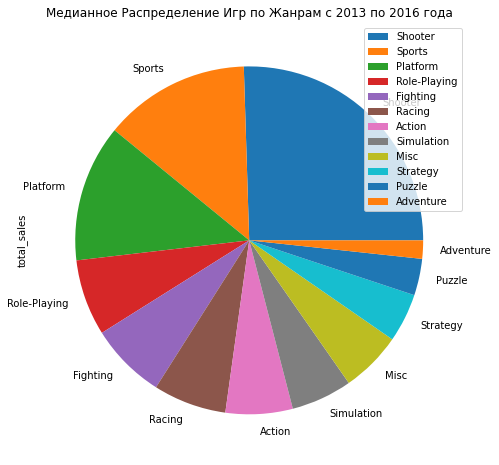

In [56]:
#Посмотрим на распределение медианных продаж игр с разделением по жанрам с 2013 года
actual_period3.pivot_table(index='genre', 
                           values = 'total_sales', 
                           aggfunc = 'median').sort_values(by='total_sales', 
                                                        ascending=False).plot(kind='pie',
                                                                              y= 'total_sales',
                                                                              figsize = (15,8))


plt.title('Медианное Распределение Игр по Жанрам с 2013 по 2016 года')
plt.show()

<div class="alert alert-block alert-success">
    
ТОП 3 прибыльных жанра по всем платформам:
- Shooter
- Sports
- Platform

Анти ТОП 3 жанра по всем платформам:
- Adventure
- Puzzle
- Strategy

## Шаг 4. Составим портрет пользователя каждого региона

### 4.1.1. **Портрет американского пользователя:**

Text(0.5, 1.0, 'Объем Продаж по Игровым Платформам в Северной Америке')

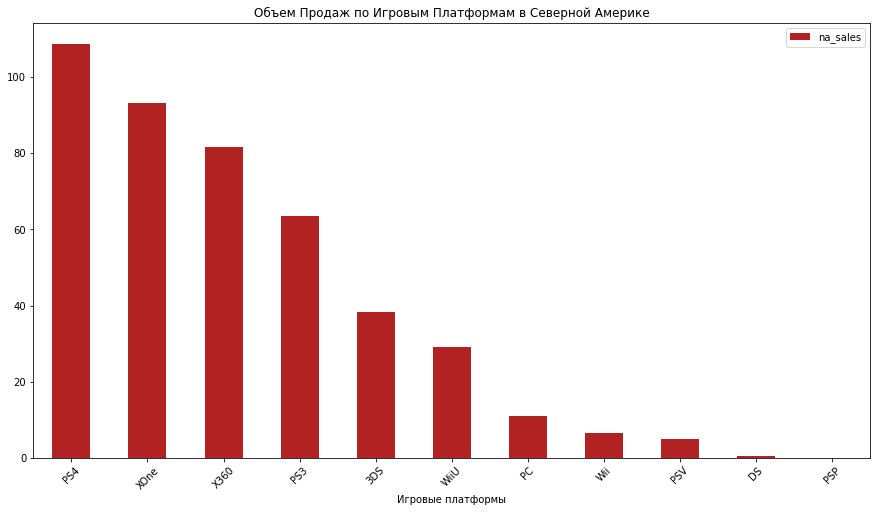

In [57]:
na_platform = actual_period3.pivot_table(index='platform', 
                                         values = 'na_sales', 
                                         aggfunc = 'sum').sort_values(by='na_sales', 
                                                                      ascending=False)
na_platform.plot(kind='bar', color='firebrick', figsize = (15,8))
plt.xticks(rotation = 45) 
plt.xlabel('Игровые платформы')
#plt.ylabel('Объем продаж в Северной Америке')
plt.title('Объем Продаж по Игровым Платформам в Северной Америке')

In [58]:
#вычислим общий объем продаж в Северной Америке:
na_sales_sum = na_platform['na_sales'].sum()
na_sales_sum

437.71

In [59]:
na_platform_percent = na_platform / na_sales_sum * 100
na_platform_percent.round(2)

,na_sales
platform,
PS4,24.84
XOne,21.27
X360,18.66
PS3,14.51
3DS,8.73
WiiU,6.67
PC,2.54
Wii,1.50
PSV,1.15


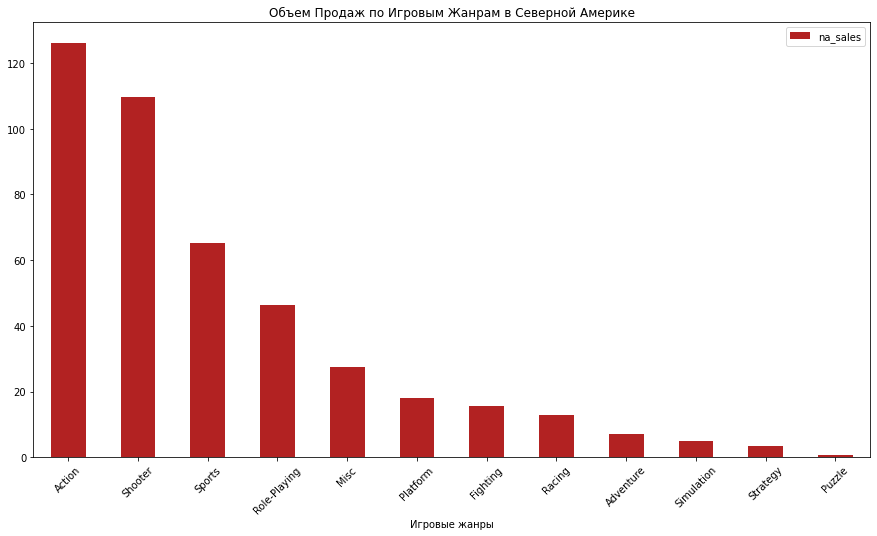

In [60]:
na_genre = actual_period3.pivot_table(index='genre', 
                                      values = 'na_sales', 
                                      aggfunc = 'sum').sort_values(by='na_sales', 
                                                                   ascending=False)
na_genre.plot(kind='bar', color='firebrick', figsize = (15,8))
plt.xticks(rotation = 45) 
plt.xlabel('Игровые жанры')
plt.title('Объем Продаж по Игровым Жанрам в Северной Америке');

In [61]:
na_genre_percent = na_genre / na_sales_sum * 100
na_genre_percent.round(2)

,na_sales
genre,
Action,28.80
Shooter,25.07
Sports,14.91
Role-Playing,10.60
Misc,6.28
Platform,4.14
Fighting,3.55
Racing,2.96
Adventure,1.63


<div class="alert alert-block alert-success">

Типичный пользователь игровых платформ в Северной Америке предпочитает

играть на:
- PS4 (24.84% от всех платформ в СА)
- XOne (21.27%)
- X360 (18.66%)
- PS3 (14.51%)
- 3DS (8.73%)

в игры жанров:
- Action (28.8%)
- Shooter (25.07%)
- Sports (14.91%)
- Role-Playing (10.6%)
- Misc (6.28%)

XOne и X360 - это американские игровые приставки компании Microsoft, то есть почти превалирующее количество американских пользователей (39.93% пользователей) предпочитают отечественную платформу. Все остальные популярные в Северной Америке консоли - Японские (в сумме составляют более 60% всех используемых игровых платформ), наиболее популярная - японская PS4 (24.84%).
Американский пользователь предпочитает захватывающие экшн-игры и шутеры, спортивные игры, а также ролевые (в которые непременно входят фэнтезийные продукты и симуляция мира средневековья), а также комплексного жанра misc.

### 4.1.2. **Портрет европейского пользователя:**

Text(0.5, 1.0, 'Объем Продаж по Игровым Платформам в ЕС')

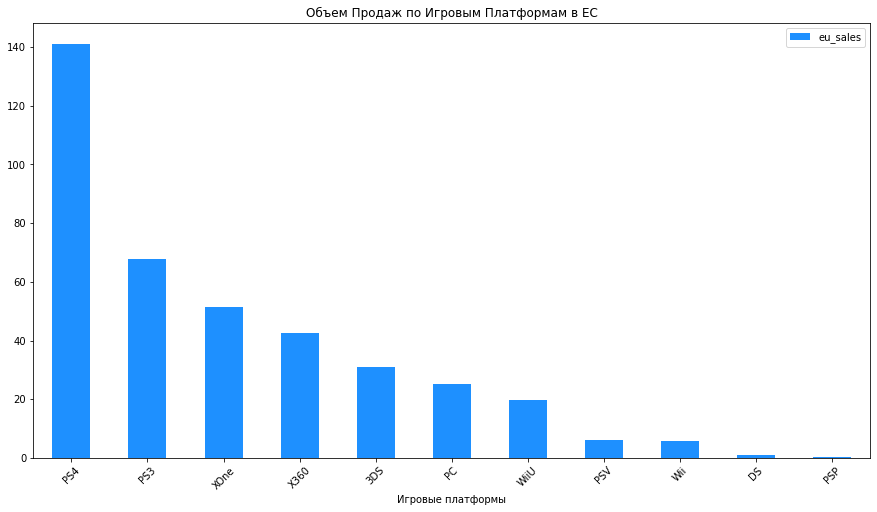

In [62]:
eu_platform = actual_period3.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False)
eu_platform.plot(kind='bar', color='dodgerblue', figsize = (15,8))
plt.xticks(rotation = 45) 
plt.xlabel('Игровые платформы')
plt.title('Объем Продаж по Игровым Платформам в ЕС')

In [63]:
eu_sales_sum = eu_platform['eu_sales'].sum()
eu_sales_sum

392.23

In [64]:
eu_platform_percent = eu_platform / eu_sales_sum * 100
eu_platform_percent.round(2)

,eu_sales
platform,
PS4,35.97
PS3,17.29
XOne,13.15
X360,10.84
3DS,7.89
PC,6.47
WiiU,5.06
PSV,1.56
Wii,1.51


Text(0.5, 1.0, 'Объем Продаж по Игровым Жанрам в ЕС')

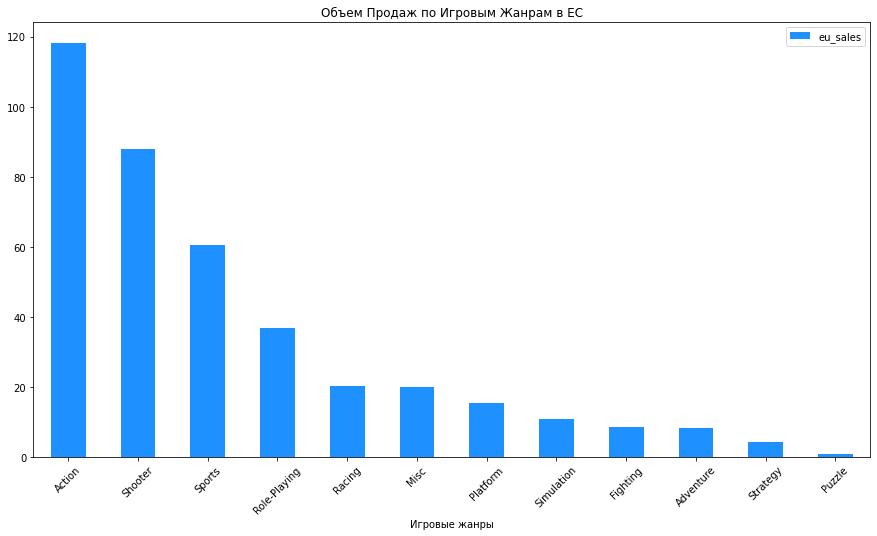

In [65]:
eu_genre = actual_period3.pivot_table(index='genre', 
                                      values = 'eu_sales', 
                                      aggfunc = 'sum').sort_values(by='eu_sales', 
                                                                   ascending=False)
eu_genre.plot(kind='bar', color='dodgerblue', figsize = (15,8))
plt.xlabel('Игровые жанры')
plt.xticks(rotation = 45) 
plt.title('Объем Продаж по Игровым Жанрам в ЕС')

In [66]:
eu_genre_percent = eu_genre / eu_sales_sum * 100
eu_genre_percent.round(2)

,eu_sales
genre,
Action,30.12
Shooter,22.40
Sports,15.43
Role-Playing,9.43
Racing,5.15
Misc,5.11
Platform,3.97
Simulation,2.78
Fighting,2.18


<div class="alert alert-block alert-success">

Типичный пользователь игровых платформ в Евросоюзе предпочитает

играть на:
- PS4 (35.97%)
- PS3 (17.29%)
- XBox One (13.15%)
- X360 (10.84%)
- 3DS (7.89%)

в игры жанров:
- Action (30.12%)
- Shooter (22.40%)
- Sports (15.43%)
- Role-Playing (9.43%)
- Racing (5.15%)

Игроки из Европейского Союза почти аналогичны игрокам из Северной Америки, за исключением сильного превалирования PS4 (тогда, как у пользователей из NA PS4 и XOne были почти равны по охвату) среди всех платформ (но список ТОП игровых платформ тот же) и включением Гонок в список предпочитаемых игровых жанров. Американские игровые приставки от Microsoft занимают 53.26% игрового рынка.

### 4.1.3. **Портрет японского пользователя:**

Text(0.5, 1.0, 'Объем Продаж по Игровым Жанрам в Японии')

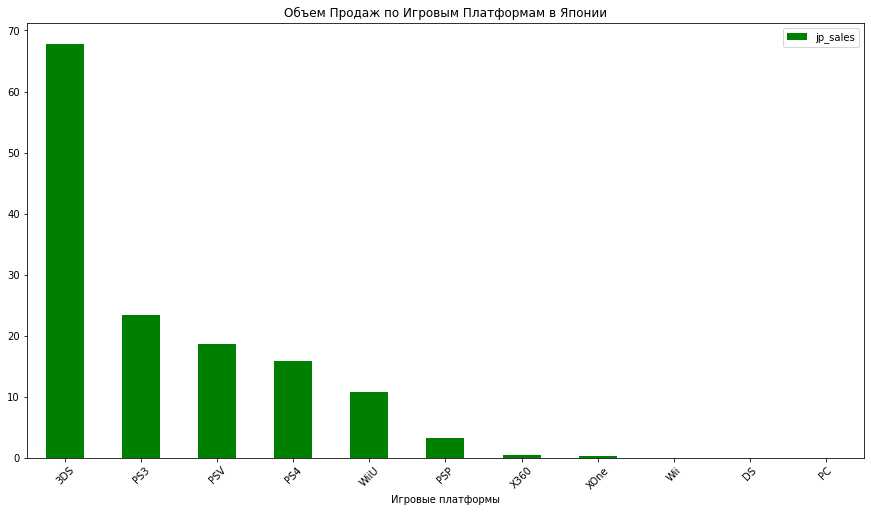

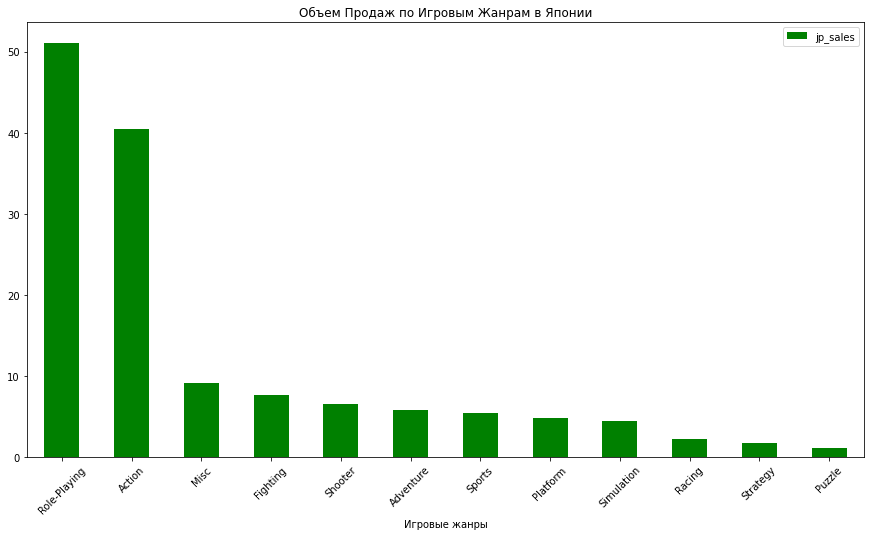

In [67]:
jp_platform = actual_period3.pivot_table(index='platform', 
                                         values = 'jp_sales', 
                                         aggfunc = 'sum').sort_values(by='jp_sales', 
                                                                      ascending=False)
jp_platform.plot(kind='bar', color='green', figsize = (15,8))
jp_platform_sum = jp_platform['jp_sales'].sum()
plt.xticks(rotation = 45) 
plt.xlabel('Игровые платформы')
plt.title('Объем Продаж по Игровым Платформам в Японии')

jp_genre = actual_period3.pivot_table(index='genre', 
                                      values = 'jp_sales', 
                                      aggfunc = 'sum').sort_values(by='jp_sales', 
                                                                   ascending=False)
jp_genre_sum = jp_genre['jp_sales'].sum() #общая сумма продаж в Японии
jp_genre.plot(kind='bar', color='green',figsize = (15,8))
plt.xticks(rotation = 45) 
plt.xlabel('Игровые жанры')
plt.title('Объем Продаж по Игровым Жанрам в Японии')

In [68]:
jp_genre_sum

140.78000000000003

In [69]:
jp_platform_percent = jp_platform / jp_genre_sum * 100
jp_platform_percent.round(2)

,jp_sales
platform,
3DS,48.17
PS3,16.59
PSV,13.21
PS4,11.34
WiiU,7.73
PSP,2.34
X360,0.36
XOne,0.24
Wii,0.04


In [70]:
jp_genre_percent = jp_genre / jp_genre_sum * 100
jp_genre_percent


,jp_sales
genre,
Role-Playing,36.255150
Action,28.761188
Misc,6.535019
Fighting,5.434011
Shooter,4.695269
Adventure,4.134110
Sports,3.842875
Platform,3.402472
Simulation,3.210683


<div class="alert alert-block alert-success">

Типичный пользователь игровых платформ в Японии предпочитает

играть на:
- 3DS (48.17%)
- PS3, PSV, PS4 и WiiU составляют лишь малую часть от используемых консолей (в сумме 48.87%)

в игры жанров:
- Role-Playing (36%)
- Action (28.76%)
- Fighting (5.43%)
- Misc (6.54%)
- Shooter (4.69%)

ТОП-5 востребованных игровых платфом в Японии - их же японского производства. Такому разнообразию отечественных консолей остается только позавидовать. Лидирует продукт от Nintendo - 3DS (48.17% всех продаж в Японии). 3DS - это портативный игровой продукт, "вытянувший" Nintendo из экономической пропасти. Ассортимент магазина игр для данной консоли растет с каждым днем и каждый может найти себе что-нибудь по душе. 
Любовь к портативным консолям также определяет превалирование жанров, которые в основном подходят для использования на подобных портативных устройствах.

Игрок из Японии заметно отличается от пользователей из Северной Америки и Евросоюза. А объединяет их любовь к Экшн-играм, PlayStation 3 и PlayStation 4. 

### 4.1.3. **Портрет пользователя в других странах:**

Text(0.5, 1.0, 'Объем Продаж по Игровым Платформам в Других Странах')

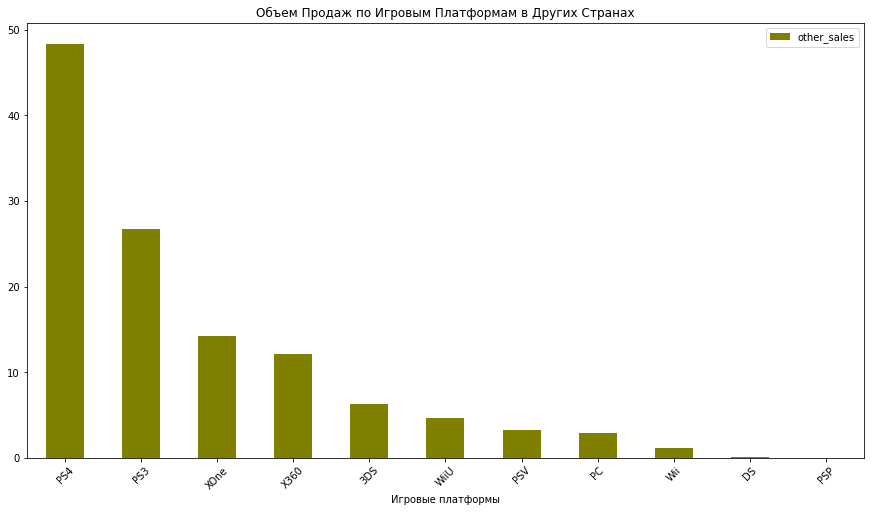

In [71]:
other_platform = actual_period3.pivot_table(index='platform', 
                                            values = 'other_sales', 
                                            aggfunc = 'sum').sort_values(by='other_sales', 
                                                                         ascending=False)
other_platform.plot(kind='bar', color = 'olive', figsize = (15,8))
plt.xlabel('Игровые платформы')
plt.xticks(rotation = 45)
#plt.ylabel('Объем продаж в других странах')
plt.title('Объем Продаж по Игровым Платформам в Других Странах')

In [72]:
other_sales_sum = other_platform['other_sales'].sum()
other_sales_sum
other_platform_percent = other_platform / other_sales_sum * 100
other_platform_percent.round(2)

,other_sales
platform,
PS4,40.30
PS3,22.31
XOne,11.89
X360,10.09
3DS,5.23
WiiU,3.91
PSV,2.72
PC,2.47
Wii,0.93


Text(0.5, 1.0, 'Объем Продаж по Игровым Жанрам в Других Странах')

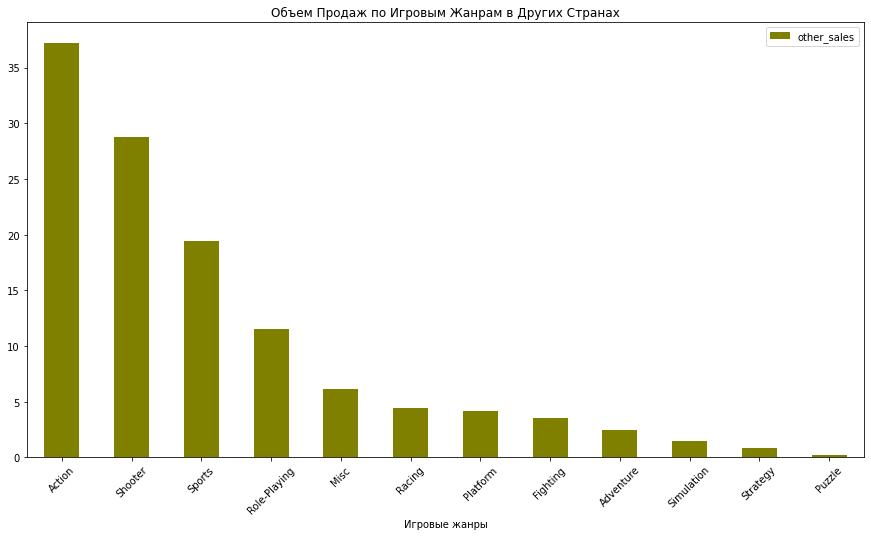

In [73]:
other_genre = actual_period3.pivot_table(index='genre', values = 'other_sales', aggfunc = 'sum').sort_values(by='other_sales', ascending=False)
other_genre.plot(kind='bar', color='olive', figsize = (15,8))
plt.xlabel('Игровые жанры')
plt.xticks(rotation = 45)
plt.title('Объем Продаж по Игровым Жанрам в Других Странах')

In [74]:
other_genre_percent = other_genre / other_sales_sum * 100
other_genre_percent.round(2)

,other_sales
genre,
Action,31.01
Shooter,23.98
Sports,16.21
Role-Playing,9.57
Misc,5.08
Racing,3.70
Platform,3.43
Fighting,2.97
Adventure,2.03


<div class="alert alert-block alert-success">

В других странах ТОП-5 самых популярных платформ:
- PS4 (40.3%)
- PS3 (22.31%)
- XOne (11.89%)
- X360 (10.09%)
- 3DS (5.23%)

<div class="alert alert-block alert-success">

В других странах ТОП-5 игровых жанров:
 - Action (31.01%)
 - Shooter (23.98%)
 - Sports (16.21%)
 - Role-Playing (9.57%)
 - Misc (5.08%)

<div class="alert alert-block alert-success">

Во всем остальном мире, также как и в Северной Америке и в ЕС, лидирует игровая платформа PS4, следом по популярности -  ее предыдущая версия - PS3. На 3, 4 и 5 местах также закрепились американские XOne, X360 и, как ни странно, 3DS (а значит, что в мире портативные игровые продукты не так уж и редки).

Пользователи со всего мира также тяготеют к экшн-играм, шутерам, спортивному жанру, ролевым компьютерным играм и смешанному жанру. В целом, жанры-фавориты по регионам примерно одинаковы, меняется лишь их соотношение.



Text(0.5, 1.0, 'Объем Продаж Игр по Жанрам')

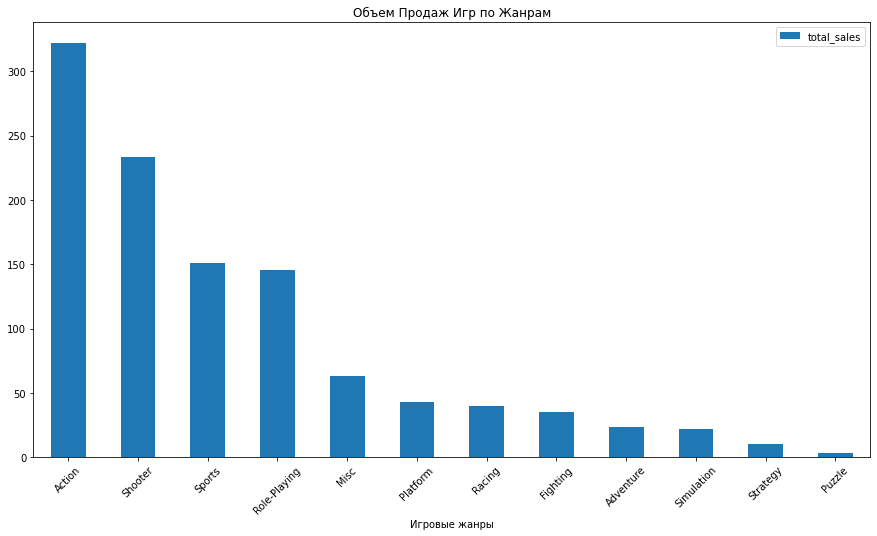

In [75]:
#посмотрим на распределение всех продаж игр по жанрам:
actual_period3.pivot_table(index='genre', 
                           values = 'total_sales', 
                           aggfunc = 'sum').sort_values(by='total_sales', 
                                                        ascending=False).plot(kind='bar',
                                                                              figsize = (15,8))
plt.xlabel('Игровые жанры')
plt.xticks(rotation = 45)
plt.title('Объем Продаж Игр по Жанрам')

<div class="alert alert-block alert-success">

Мы видим четкое выделение жанров с высокими, средними и низкими объемами продаж.

Самые прибыльные жанры:
- Action (экшн-игры заметно выделяются на фоне остальных жанров)
- Shooter
- Sports

Самые плохо продаваемые жанры:
- Simulation
- Puzzle
- Strategy

## 4.2. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [76]:
actual_period3['rating']

16         M
23         M
31       NaN
33       NaN
42         M
        ... 
16703    NaN
16707    NaN
16710    NaN
16712    NaN
16714    NaN
Name: rating, Length: 2233, dtype: object

В столбце 'rating' у нас много пропущенных значений. Для анализа нам необходимо их заполнить,чтобы не потерять данные. Сделаем это с помощью  "unknown"

actual_period3['rating'] = actual_period3['rating'].fillna('unknown')

In [77]:
ESRB_rating = actual_period3.pivot_table(index = 'rating', 
                                         values = ['eu_sales','jp_sales','na_sales','other_sales'], 
                                         aggfunc = 'sum')

In [78]:
ESRB_rating

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,83.36,15.14,79.05,22.61
E10+,42.69,5.89,54.24,12.57
M,145.32,14.11,165.21,47.04
T,41.95,20.59,49.79,14.29


In [79]:
regions_list = ['eu_sales','jp_sales','na_sales','other_sales']

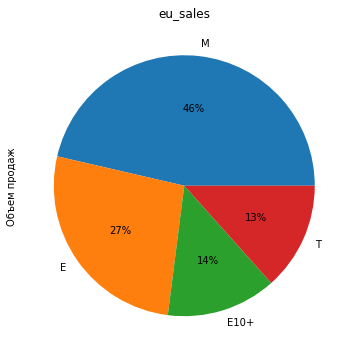

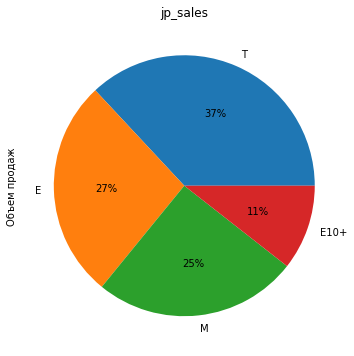

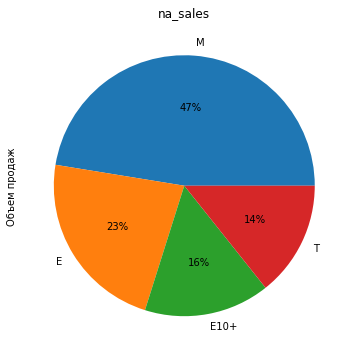

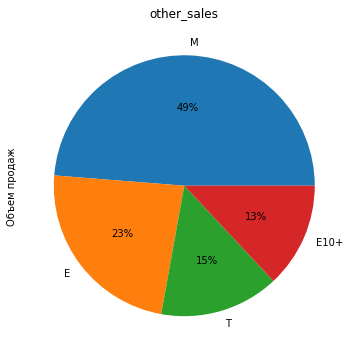

In [80]:
for i in regions_list:
    ESRB_rating.sort_values(i, ascending=False).head(5).plot(kind='pie', 
                                                      y=i, 
                                                      autopct = '%1.0f%%', 
                                                      figsize=(8,6), 
                                                      legend=False, title=i).set(ylabel='Объем продаж')
    plt.show();

**Для EU, NA и других стран** самые высокие продажи у игр с рейтингом M (Подходит для лиц старше 17 лет).
**Для JP** самые высокие продажи у игр с неопределенным рейтингом 'unknown'.
Самый маленький объем продаж по всем странам у T (Подходит для лиц старше 13 лет) и E10+ (Подходит для лиц старше 10 лет)

Данный факт объясняется жанрами, которые предпочитают пользователи конкретных регионов: экшн, шутеры, спортивные игры, а также ролевые игры и со смешанным жанром - первые два жанра обычно подходят для лиц 17+ и их сформировавшейся психики.

<div class="alert alert-block alert-success">

Вывод:

Рейтинг ESRB не влияет на продажи в отдельном регионе. Продажи в отдельном регионе скорее зависят от жанровых предпочтений пользователей, а рейтинг, чаще всего, определяется именно из жанра. Action и Shooter, которые так любят пользователи EU, NA и других стран, подходят для лиц старше 17 лет (рейтинг M), но никак не младше. А многие игры Role-Playing, которые предпочитают пользователи JP, возможно не все оценены , но также, во многом, подходят для лиц, старше 13 лет.

# Шаг 5. Проверка гипотез

**Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

**Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

**Обе гипотезы являются двусторонними.** Гипотеза 1: средние рейтинги или одинаковые (H0), или разные (H1). Разными они могут быть в обе стороны: у XBox One больше, а у PC - меньше, или наоборот - у PC больше, у XBox One - меньше.

Гипотеза 2: средние рейтинги или одинаковые (H0), или разные (H1). Сравнение в обе стороны аналогично вышеописанному.

Выборки в нашем случае независимы. Используем t-тест для средних значений двух независимых выборок st.ttest_ind(). Считаем дисперсии выборок равными.



## 5.1. Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [81]:
#сформулируем две гипотезы для дальнейшего анализа:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [82]:
XOne_rat = actual_period3[(actual_period3['user_score'] >= 0) & (actual_period3['platform'] == 'XOne')]['user_score']
PC_rat = actual_period3[(actual_period3['user_score'] >= 0) & (actual_period3['platform'] == 'PC')]['user_score']

In [83]:
PC_rat

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64

In [84]:
XOne_mean = XOne_rat.mean()
PC_mean = PC_rat.mean()
print('Средний пользовательский рейтинг Xbox One:', XOne_mean)
print('Средний пользовательский рейтинг PC:', PC_mean)

Средний пользовательский рейтинг Xbox One: 6.52142857142857
Средний пользовательский рейтинг PC: 6.269677419354836


**Проверяем H0:**

Примем alpha = 0.05. Не будем менять общепринятое пороговое значение. 

In [85]:
alpha = 0.05
results = st.ttest_ind(XOne_rat, PC_rat) 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-success">

Гипотеза 1 подтвердилась:
    
У нас нет оснований считать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

## 5.2. Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [86]:
#сформулируем две гипотезы для интересующего нас анализа:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports разные

In [87]:
action_usc = actual_period3[(actual_period3['user_score'] >= 0) & (actual_period3['genre'] == 'Action')]['user_score']
sports_usc = actual_period3[(actual_period3['user_score'] >= 0) & (actual_period3['genre'] == 'Sports')]['user_score']

In [88]:
action_mean = action_usc.mean()
sports_mean = sports_usc.mean()
print('Средний пользовательский рейтинг жанра Action:', action_mean)
print('Средний пользовательский рейтинг жанра Sports:', sports_mean)

Средний пользовательский рейтинг жанра Action: 6.837532133676097
Средний пользовательский рейтинг жанра Sports: 5.238124999999999


In [89]:
alpha = 0.05
results = st.ttest_ind(action_usc, sports_usc) 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-success">

Гипотеза 2 подтвердилась:

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Шаг 6. Общий вывод

<div class="alert alert-block alert-success">
    
## Общий вывод 🏁

Проанализирован огромный датасет с данными по продаже игр за много лет по всему миру для разных игровых платформ. В основном анализе отправным годом мы посчитали 2013, так как он был критическим и переворотным для многих платформ.
Игровые платформы в среднем живут 8-10 лет. Самая долгоживущая - это PC, которая появилась в самом начале 90-х и игры для которой выпускаются и продаются до сих пор. В основном, игровые платформы появляются в конце 90-х - начале 2000-х годов.

Самая популярная платформа за анализируемый период - PS4.
В процессе анализа выяснилось, что оценки критиков и пользователей по-разному влияют на объем продаж. Оценки пользователей практически не воздействуют на данный показатель, оценки критиков-профессионалов умеренно влияют на объемы продаж игр по всему миру, а сами пользователи прислушиваются к мнению экспертов оценки. Там, где существует связь, она умеренная и прямая.
Самыми прибыльными жанрами за анализируемый период оказались:
- Shooter
- Sports
- Platform
- Role-Playing
- Fighting

**Пользователи из разных регионов имеют свои особенности и предпочтения.** 
Почти превалирующее количество американских пользователей (39.93% пользователей) предпочитают отечественную платформу. Все остальные популярные в Северной Америке консоли - Японские (в сумме составляют более 60% всех используемых игровых платформ), наиболее популярная - японская PS4 (24.84%). Американский пользователь предпочитает захватывающие экшн-игры и шутеры, спортивные игры, а также ролевые и игры комплексного жанра misc.

Игроки из Европейского Союза почти аналогичны игрокам из Северной Америки, за исключением сильного превалирования PS4 (тогда, как у пользователей из Америки PS4 и XOne были почти равны по охвату) среди всех платформ (но список ТОП игровых платформ тот же) и включением Гонок в список предпочитаемых игровых жанров. Американские игровые приставки от Microsoft занимают 53.26% игрового рынка.

Игрок из Японии заметно отличается от пользователей из Северной Америки и Евросоюза. А объединяет их любовь к Экшн-играм, PlayStation 3 и PlayStation 4. ТОП-5 востребованных игровых платформ в Японии - их же японского производства. Лидирует продукт от Nintendo -  портативная приставка 3DS (48.17% всех продаж в Японии). 3DS - это портативный игровой продукт, "вытянувший" Nintendo из экономической пропасти. Ассортимент магазина игр для данной консоли растет с каждым днем и каждый может найти себе что-нибудь по душе. Любовь японцев к портативным консолям также определяет превалирование жанров, которые в основном подходят для использования на подобных портативных устройствах: Role-Playing (36%), Action (28.76%), Fighting (5.43%), Misc (6.54%), Shooter (4.69%)

Во всем остальном мире, также как и в Северной Америке и в ЕС, лидирует игровая платформа PS4, следом по популярности - ее предыдущая версия - PS3. На 3, 4 и 5 местах также закрепились американские XOne, X360 и 3DS.
Пользователи со всего мира также тяготеют к экшн-играм, шутерам, спортивному жанру, ролевым компьютерным играм и смешанному жанру. В целом, жанры-фавориты по регионам примерно одинаковы, меняется лишь их соотношение.

**Рейтинг ESRB не влияет на продажи в отдельно взятом регионе.** Для EU и NA самые высокие продажи у игр с рейтингом M (Подходит для лиц старше 17 лет), далее у EU с рейтингом E (Подходит для всех возрастных категорий), "unknown" (рейтинг не определен),E10+ (Подходит для лиц старше 10 лет) и T (Подходит для лиц старше 13 лет). У NA после рейтинга M следуют игры с рейтингами "unknown", E, E10+, T. Для JP самые высокие продажи у игр с рейтингами 'unknown' (рейтинг не определен), T, E, потом следуют M и E10+. Для других стран – это M,"unknown", E, затем T и E10+. Продажи с определенным рейтингом ESRB скорее связаны с жанровыми предпочтениями игроков, чем с конкретным рейтингом.
**Были проверены  и подтверждены две гипотезы:**
Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.
Гипотеза 1 была подтверждена, Гипотеза 2 также подтвердилась. 

Мы пришли к тому, что наиболее перспективная существующая игровая платформа - это японская PS4. А при организации продаж игр следует ориентироваться на сегментацию пользователей по жанровым предпочтениям в разрезе регионов